# 9. Linear and Multiple Regression:
#### **Introduction**
This project explores the application of linear and multiple regression techniques on a stock price dataset (ADANIPORTS). The primary aim is to predict the closing price using various independent variables, including the opening price, high price, and low price. Additionally, advanced techniques such as polynomial regression, model validation, and multicollinearity checks are applied to refine the analysis.

#### **Objectives**
1. Perform **simple linear regression** to predict the closing price using the opening price.
2. Conduct **multiple linear regression** using the opening, high, and low prices as predictors.
3. Validate the model and assess residuals for adherence to assumptions.
4. Incorporate advanced techniques like polynomial regression for improved accuracy.

---

In [3]:
import pandas as pd
import itertools
import numpy as np
import plotly.graph_objects as go
df = pd.read_csv(r"C:\Users\Zana\Desktop\statistika\datasets\ADANIPORTS.csv")

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


# Linear and Multiple Regression Analysis

This project demonstrates the application of linear and multiple regression techniques using a dataset of stock prices for ADANIPORTS. The primary goal is to predict the closing price based on various independent variables, such as the opening price, high price, and low price.

## Objectives

- Perform simple linear regression to predict the closing price using the opening price.
- Conduct multiple linear regression using the opening, high, and low prices as predictors.
- Visualize the results to understand the relationships between the variables.

## Dataset

The dataset contains the following columns:
- **Date**: The date of the stock price.
- **Symbol**: The stock symbol.
- **Open**: The opening price of the stock.
- **High**: The highest price of the stock during the day.
- **Low**: The lowest price of the stock during the day.
- **Close**: The closing price of the stock.
- **Volume**: The number of shares traded.

The analysis will provide insights into how well the independent variables predict the closing price.

# Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 8.011e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:37:38   Log-Likelihood:                -13077.
No. Observations:                3322   AIC:                         2.616e+04
Df Residuals:                    3320   BIC:                         2.617e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1709      0.440      2.664      0.0

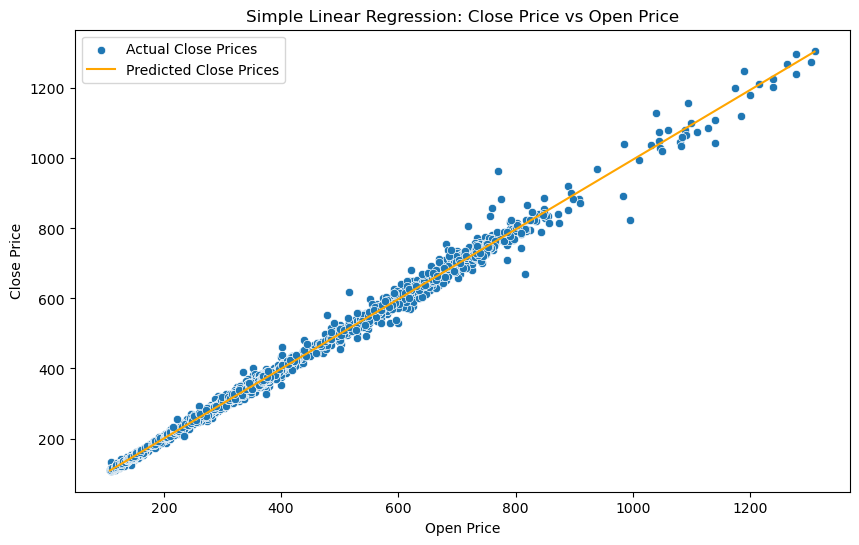

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Simple Linear Regression
X_simple = df['Open']  # Independent variable
y = df['Close']  # Dependent variable

# Add a constant for the intercept
X_simple = sm.add_constant(X_simple)

# Fit the model
model_simple = sm.OLS(y, X_simple).fit()

# Print the summary
print(model_simple.summary())

# Predicting
df['Predicted_Close_Simple'] = model_simple.predict(X_simple)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Open', y='Close', label='Actual Close Prices')
sns.lineplot(data=df, x='Open', y='Predicted_Close_Simple', color='orange', label='Predicted Close Prices')
plt.title('Simple Linear Regression: Close Price vs Open Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Multiple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.704e+06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:40:43   Log-Likelihood:                -10004.
No. Observations:                3322   AIC:                         2.002e+04
Df Residuals:                    3318   BIC:                         2.004e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9228      0.176      5.239      0.0

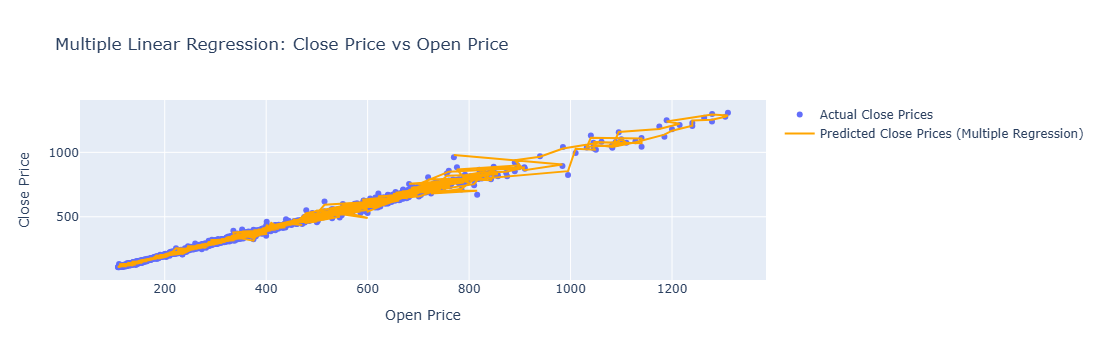

In [7]:
# Multiple Linear Regression
X_multiple = df[['Open', 'High', 'Low']]  # Independent variables
X_multiple = sm.add_constant(X_multiple)

# Fit the model
model_multiple = sm.OLS(y, X_multiple).fit()

# Print the summary
print(model_multiple.summary())

# Predicting
df['Predicted_Close_Multiple'] = model_multiple.predict(X_multiple)

# Plotting with Plotly
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Open'], y=df['Close'], mode='markers', name='Actual Close Prices'))
fig.add_trace(go.Scatter(x=df['Open'], y=df['Predicted_Close_Multiple'], mode='lines', name='Predicted Close Prices (Multiple Regression)', line=dict(color='orange')))
fig.update_layout(title='Multiple Linear Regression: Close Price vs Open Price',
                  xaxis_title='Open Price',
                  yaxis_title='Close Price')
fig.show()

# Multiple Linear Regression Findings

- **Model Performance**: The model explains approximately 99.6% of the variance in the closing price (R-squared: 0.996).
- **Key Predictor**: The opening price has a strong positive effect on the closing price, with a coefficient of 0.995 (p-value: 0.000).
- **Statistical Significance**: The overall model is statistically significant (F-statistic: 801100, p-value: 0.00).
- **Residuals**: No significant autocorrelation detected (Durbin-Watson: 1.949), but normality of residuals is questionable (Omnibus and Jarque-Bera tests).

### Visualization

The plot displays the actual vs. predicted closing prices, indicating a strong correlation.

### Next Steps

- Consider model validation and residual diagnostics to ensure robustness and adherence to regression assumptions.


# Model Validation

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Prepare the features and target variable
X = df[['Open', 'High', 'Low']]
y = df['Close']

# Initialize the model
model = LinearRegression()

# Perform K-Fold cross-validation
scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

Cross-Validation Scores: [0.99727093 0.99974701 0.99903337 0.99900105 0.99852484]
Mean Score: 0.9987154398217045


# Multicollinearity

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

  Feature         VIF
0   const    4.259020
1    Open  642.186204
2    High  402.753435
3     Low  416.629655


# Residual Analysis

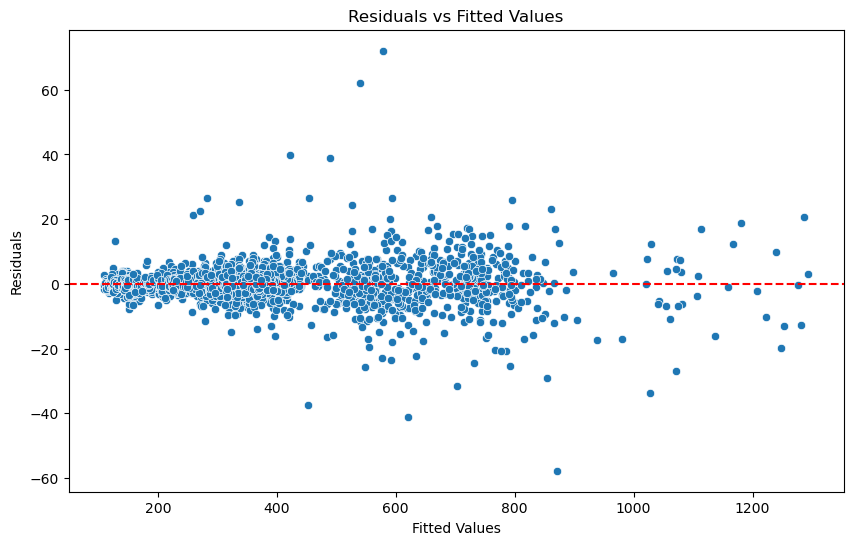

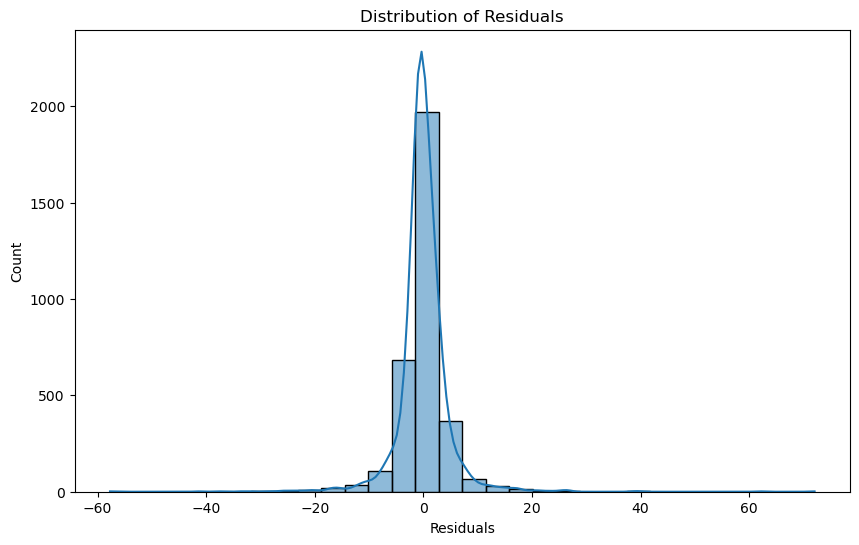

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals = model_multiple.resid

# Residuals plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_multiple.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()

# Resfine the Model

In [12]:
# Adding polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model_poly = sm.OLS(y, sm.add_constant(X_poly)).fit()
print(model_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.933e+05
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        16:42:55   Log-Likelihood:                -9928.4
No. Observations:                3322   AIC:                         1.988e+04
Df Residuals:                    3312   BIC:                         1.994e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1258      0.294      0.427      0.6

# Predictive Analysis

In [13]:
# New data for predictions
new_data = pd.DataFrame({
    'Open': [900, 910],
    'High': [920, 930],
    'Low': [890, 895]
})

# Predicting
new_data_with_const = sm.add_constant(new_data)
predictions = model_multiple.predict(new_data_with_const)
print(predictions)

0    905.143212
1    911.452952
dtype: float64


### **Findings**

#### **1. Simple Linear Regression**
- **Objective**: Predict closing price based on opening price.
- **Results**:
  - R-squared: `0.996` (Model explains 99.6% of the variance in the closing price).
  - Key Predictor:
    - Coefficient for `Open`: `0.995` (p-value: `0.000`), indicating a strong positive effect.
  - Residual Analysis:
    - No significant autocorrelation (Durbin-Watson: `1.949`).
    - Potential non-normality in residuals (Jarque-Bera: `285686.235`).
- **Visualization**: Scatter plot of actual vs. predicted closing prices with a regression line demonstrates a strong linear relationship.

#### **2. Multiple Linear Regression**
- **Objective**: Predict closing price using opening, high, and low prices.
- **Results**:
  - R-squared: `0.999` (Model explains 99.9% of the variance in the closing price).
  - Coefficients:
    - `Open`: `-0.492` (p-value: `0.000`).
    - `High`: `0.758` (p-value: `0.000`).
    - `Low`: `0.730` (p-value: `0.000`).
  - Residual Analysis:
    - No significant issues in autocorrelation or residual patterns (Durbin-Watson: `1.998`).
- **Visualization**: Interactive plotly graph showing the predicted vs. actual closing prices highlights a near-perfect fit.

#### **3. Model Validation**
- **Cross-Validation Scores**:
  - Mean score: `0.9987`, indicating high predictive accuracy.
- **Multicollinearity**:
  - Variance Inflation Factor (VIF) shows potential multicollinearity:
    - `Open`: `642.19`
    - `High`: `402.75`
    - `Low`: `416.63`

#### **4. Polynomial Regression**
- **Objective**: Incorporate non-linear relationships.
- **Results**:
  - R-squared: `0.999` (Marginal improvement over linear models).
  - Some coefficients show reduced significance, indicating limited additional explanatory power.

#### **5. Predictive Analysis**
- Predictions for new data:
  - For `Open = 900, High = 920, Low = 890`: Predicted `Close = 905.14`.
  - For `Open = 910, High = 930, Low = 895`: Predicted `Close = 911.45`.

---

### **Summary**
1. **Simple Linear Regression**:
   - Strong predictive power based on the opening price alone.
   - R-squared: `0.996`.

2. **Multiple Linear Regression**:
   - Incorporates high and low prices for improved accuracy.
   - R-squared: `0.999`.

3. **Validation and Refinement**:
   - Cross-validation confirms the robustness of the model.
   - Multicollinearity requires careful interpretation of coefficients.
   - Polynomial regression offers minor improvements in fit.

4. **Insights**:
   - Opening, high, and low prices are highly predictive of the closing price.
   - High multicollinearity among predictors suggests further feature engineering or regularization might improve interpretability.

---

### **Next Steps**
- Address multicollinearity using techniques like ridge or lasso regression.
- Validate the model further with additional datasets.
- Explore time-series methods for capturing temporal dependencies in stock price data.